# Cross-Validation
Cross-validation is a technique for assessing the performance and generalization capability of a model. It helps to ensure that the model's performance is robust and not just a result of overfitting to a particular subset of data. Here’s how it typically works:

**Partitioning the Data:** The dataset is split into multiple subsets or "folds". A common method is k-fold cross-validation, where the data is divided into
𝑘
k folds.

**Training and Testing:** The model is trained on
𝑘
−
1
k−1 of these folds and tested on the remaining fold. This process is repeated
𝑘
k times, with each fold used exactly once as the test set.

**Aggregating Results:** The performance metrics (like accuracy, precision, recall) from each iteration are averaged to provide an overall performance estimate.

**Benefits of Cross-Validation:**

Provides a more accurate measure of model performance compared to a single train-test split.
Helps in assessing how the model generalizes to an independent dataset.

# Overfitting
occurs when a model becomes too complex and learns the details and noise in the training data to the extent that it negatively impacts its performance on new, unseen data. This typically happens when:

The model has too many parameters relative to the amount of training data.
The model is too flexible and can fit a wide range of functions.
Characteristics of Overfitting:

**High Training Accuracy:** The model performs exceptionally well on the training data.
Low Testing Accuracy: The performance on unseen data or validation sets is significantly worse.
Mitigation Strategies:

**Regularization:** Techniques like L1 (Lasso) or L2 (Ridge) regularization can penalize overly complex models.
Pruning: Simplifying the model by removing parts that do not contribute to performance.
Early Stopping: Halt training before the model starts to overfit.

# Underfitting
Underfitting happens when a model is too simple to capture the underlying patterns in the data. This occurs when:

The model has too few parameters or is not complex enough.
The model is too constrained to represent the data well.

**Characteristics of Underfitting:**

Low Training Accuracy: The model performs poorly on both the training data and unseen data.
High Bias: The model makes strong assumptions about the data and fails to capture its complexity.
Mitigation Strategies:

Increasing Model Complexity: Use a more complex model or add features to better capture the data patterns.
Feature Engineering: Include additional features or transform existing ones to provide more information to the model.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Define a simple model (Logistic Regression)
simple_model = LogisticRegression(max_iter=1000)

# Define a complex model (Decision Tree with no limit on depth)
complex_model = DecisionTreeClassifier()


# Cross-Validation and Performance Evaluation

In [ ]:
# Perform cross-validation on the simple model
simple_model_cv_scores = cross_val_score(simple_model, X, y, cv=5)
print(f"Simple Model (Logistic Regression) - Cross-Validation Scores: {simple_model_cv_scores}")
print(f"Mean CV Score for Simple Model: {np.mean(simple_model_cv_scores)}")

# Perform cross-validation on the complex model
complex_model_cv_scores = cross_val_score(complex_model, X, y, cv=5)
print(f"Complex Model (Decision Tree) - Cross-Validation Scores: {complex_model_cv_scores}")
print(f"Mean CV Score for Complex Model: {np.mean(complex_model_cv_scores)}")

Simple Model (Logistic Regression) - Cross-Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean CV Score for Simple Model: 0.9733333333333334
Complex Model (Decision Tree) - Cross-Validation Scores: [0.96666667 0.96666667 0.9        1.         1.        ]
Mean CV Score for Complex Model: 0.9666666666666668


# Train and Test Models

In [ ]:
simple_model.fit(X_train, y_train)
simple_model_predictions = simple_model.predict(X_test)
print(f"Simple Model Accuracy on Test Data: {accuracy_score(y_test, simple_model_predictions)}")
complex_model.fit(X_train, y_train)
complex_model_predictions = complex_model.predict(X_test)
print(f"Complex Model Accuracy on Test Data: {accuracy_score(y_test, complex_model_predictions)}")

Simple Model Accuracy on Test Data: 1.0
Complex Model Accuracy on Test Data: 1.0


# Visualize Performance

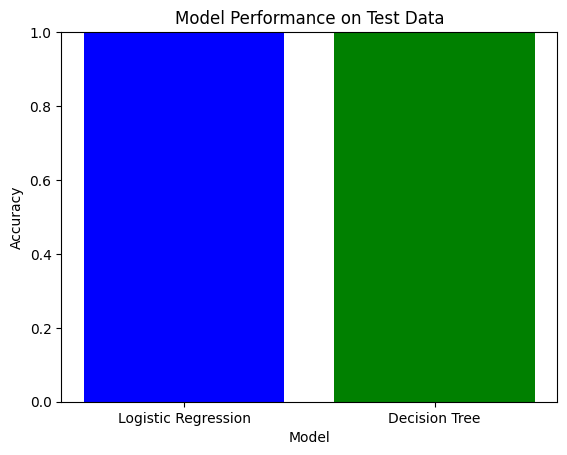

In [ ]:
models = ['Logistic Regression', 'Decision Tree']
train_scores = [accuracy_score(y_test, simple_model_predictions),
                accuracy_score(y_test, complex_model_predictions)]

plt.bar(models, train_scores, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance on Test Data')
plt.ylim([0, 1])
plt.show()
